In [1]:
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt
import random

In [99]:
df = pandas.read_csv('./breast-cancer-wisconsin.data', header=None)


In [87]:
df.columns =['Patient ID','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal adhesion',
                 'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
# print(df.loc[698]['Class'])
abandonList =[]
for patient in range(0,698):
    for feature in df.columns:
        if df.loc[patient][feature] == '?':
#             if (isinstance(df.loc[patient][feature], int) == "false"): #checking if there is any non-int data
#                 print ("fuck "+ df.loc[patient][feature],int)
            abandonList.append(patient)
                
newdf = df.drop(abandonList)

# for patient in range(0,698):
#     for feature in df.columns:
#         newdf.loc[patient][feature] = np.int64(newdf.loc[patient][feature]);
# print(newdf.index.values)

In [97]:
for patient in newdf.index.values:
#     print(newdf.loc[patient]['Bare Nuclei']);
    newValue = np.int64(newdf.loc[patient]['Bare Nuclei']);
    
    newdf.at[patient,'Bare Nuclei'] = newValue;

In [98]:
# print(type(newdf.loc[1]['Single Epithelial Cell Size']))
# print(type(newdf.loc[1]['Bare Nuclei']))
# # print(int(newdf.loc[1]['Single Epithelial Cell Size']))
# print(type(np.int64(newdf.loc[1]['Single Epithelial Cell Size'])))
# print(type(newdf.loc[1]['Single Epithelial Cell Size']) =='numpy.int64')

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
False


In [4]:
outputData = newdf.values   #convert pandas to numpy naming outputData

In [5]:
export_csv = newdf.to_csv ('./breast-cancer-wisconsin-cleaned.csv', index = None, header=True) 

In [113]:
def feature_dict(featureName):
    my_list = newdf[featureName].values
    
    # print(my_list)
    unique, counts = np.unique(my_list, return_counts=True)
    return dict(zip(unique, counts))



In [110]:
def graphFunc(featureName):
    for feature in newdf.columns:
        if(feature == featureName and feature !='Patient ID' and feature !='Class'):
            level = ['1', '2', '3', '4', '5', '6', '7','8','9','10']
            x = np.arange(len(level))
            width = 0.35  # the width of the bars
            count = []
            stats = feature_dict(feature)
            for i in range(1,11):
                if(stats.get(i)==None):
                    count.append(0);
                else:
                    count.append(stats.get(i))
            
            plt.bar(x, count, align='center', alpha=0.5)
            plt.xticks(x, level)
            plt.ylabel('Count')
            plt.xlabel('Feature Level')
            plt.title(feature +' Stats among ')
            plt.show()

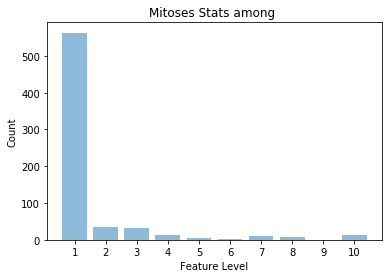

In [111]:
graphFunc('Mitoses')

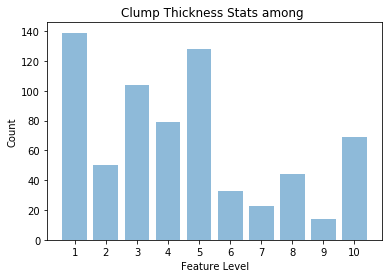

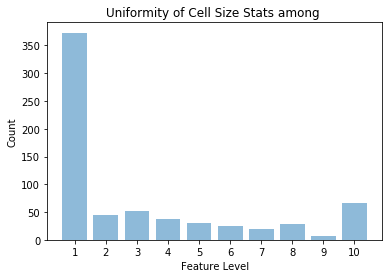

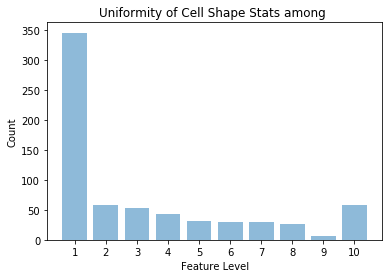

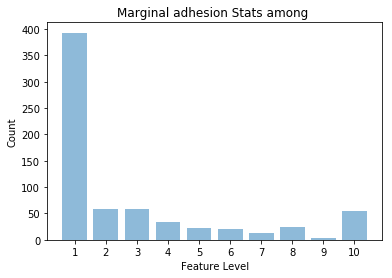

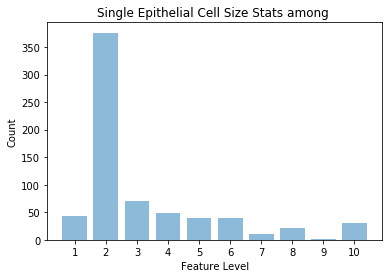

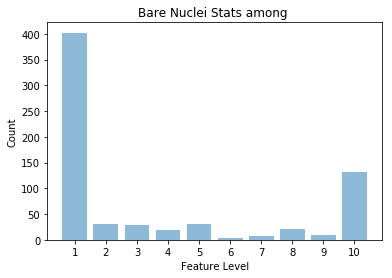

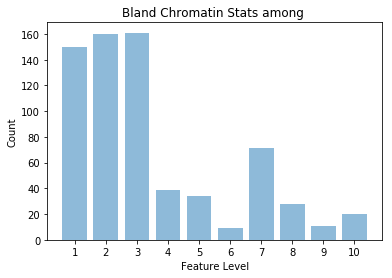

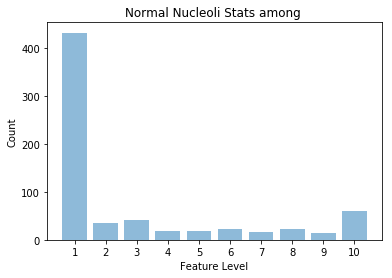

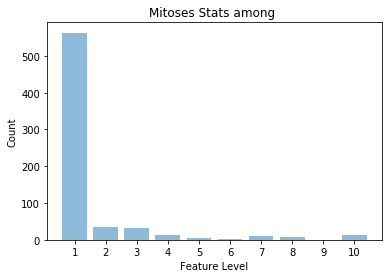

In [112]:
for feature in newdf.columns:

    graphFunc(feature);